# Decision Trees

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [3]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)   
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
    if iris:
        plt.xlabel("Petal length")
        plt.ylabel("Petal width")
    else:
        plt.xlabel(r"$x_1$", fontsize=14)
        plt.ylabel(r"$x_2$", fontsize=14, rotation=0)
    if legend:
        plt.legend(loc="best")

In [5]:
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
custom_cmap.__dict__

{'monochrome': False,
 'colors': ['#fafab0', '#9898ff', '#a0faa0'],
 'name': 'from_list',
 'N': 3,
 '_rgba_bad': (0.0, 0.0, 0.0, 0.0),
 '_rgba_under': None,
 '_rgba_over': None,
 '_i_under': 3,
 '_i_over': 4,
 '_i_bad': 5,
 '_isinit': False,
 'colorbar_extend': False}

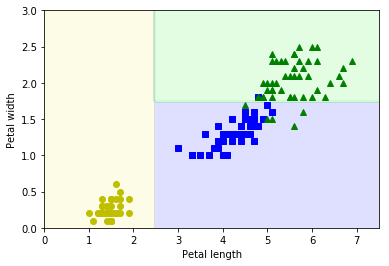

In [6]:
plot_decision_boundary(tree_clf, X, y)

In [7]:
from sklearn.tree import export_graphviz

In [8]:
export_graphviz(tree_clf, 
                out_file="../data/iris_tree.dot", 
                feature_names=iris.feature_names[2:], 
                class_names=iris.target_names, 
                rounded=True, 
                filled=True)

In [9]:
import graphviz

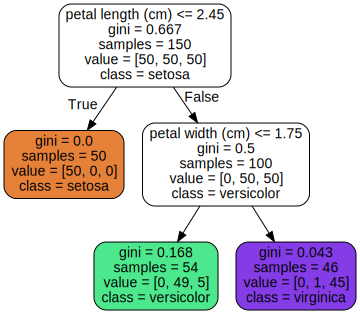

In [10]:
with open("../data/iris_tree.dot") as f:
    tree_graph = f.read()
graphviz.Source(tree_graph)

Gini shows node's impurity:

$G_i=1-\sum\limits_{k=1}^n{p_{i,\:k}}^2$

For the lowest left node Gini index is equal to 0.168:

$1-(0/54)^2-(49/54)^2-(5/54)^2=0.168$

### CART (Classification and Regression Tree) Algorythm

First node split:
- $k$ - feature
- $t_k$ - threshold

Cost function for CART classification:

$J(k,\:t_k)=\dfrac{m_{\text{left}}}{m}G_{\text{left}}+\dfrac{m_{\text{right}}}{m}G_{\text{right}}$

Where:

- $G_{\text{left\right}}$ - Gini index
- $m_{\text{left\right}}$ - amount of samples in the left and right nodes

### Entropy

$H_i=-\underset{p_{i,\:k}\neq0}{\sum\limits_{k=1}^{n}}p_{i,\:k}\log(p_{i,\:k})$

For the lowest left node entropy is equal to 0.31:

$-\dfrac{49}{54}\log\left(\dfrac{49}{54}\right)-\dfrac{5}{54}\log\left(\dfrac{5}{54}\right)\approx0.31$

## Regression

In [11]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

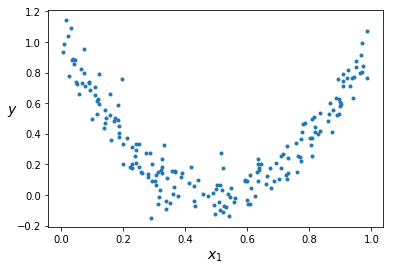

In [12]:
plt.plot(X, y, '.')
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$y$", rotation=0, fontsize=14);

In [13]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y) 

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [14]:
export_graphviz(tree_reg, 
                out_file="../data/regr_tree.dot",
                rounded=True,
                feature_names=["x1"],
                filled=True)

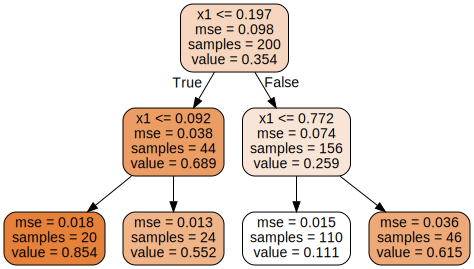

In [15]:
with open("../data/regr_tree.dot") as f:
    tree_graph = f.read()
graphviz.Source(tree_graph)

In [16]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1.2], y_label=r"$y$", 
                                legend=False, plot_thresholds=False):
    x_new = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x_new)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=14)
    if y_label:
        plt.ylabel(y_label, rotation=0, fontsize=14)
    plt.plot(X, y, 'b.')
    plt.plot(x_new, y_pred, "r-", label=r"$\hat{y}$")
    if plot_thresholds:
        if tree_reg.max_depth <= 3:
            styles = ["k-", "k--", "k--"] if tree_reg.max_depth == 2 else ["k-"] + ["k--", "k:", "k:"] * 2
            thresholds = tree_reg.tree_.threshold[tree_reg.tree_.threshold != -2.]
            for threshold, style in zip(thresholds, styles):
                plt.plot([threshold, threshold], [axes[2], axes[3]], style)
    if legend:
        plt.legend(loc="upper center", fontsize=14)

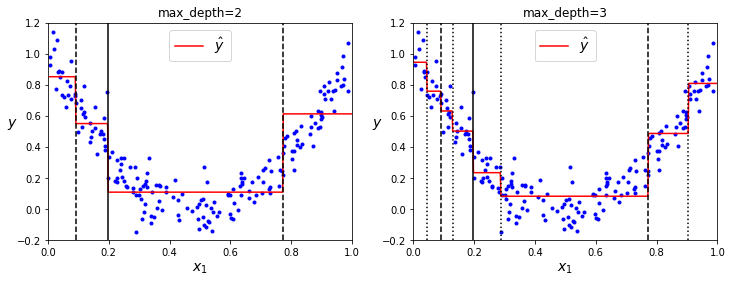

In [17]:
plt.figure(figsize=(12, 4))

for i, depth in enumerate([2, 3]):
    tree_reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_reg.fit(X, y)
    plt.subplot(121 + i)
    plot_regression_predictions(tree_reg, X, y, legend=True, plot_thresholds=True)
    plt.title("max_depth={}".format(depth))

Cost function for CART regression:

$J(k,\:t_k)=\dfrac{m_{\text{left}}}{m}MSE_{\text{left}}+\dfrac{m_{\text{right}}}{m}MSE_{\text{right}}$,

where $\begin{cases}
MSE_{\text{node}}=\sum\limits_{i\in\text{node}}\left(\hat{y}_{\text{node}}-y^{(i)}\right)^2\\
\hat{y} = \dfrac{1}{m_{\text{node}}}\sum\limits_{i\in\text{node}}y^{(i)}
\end{cases}$

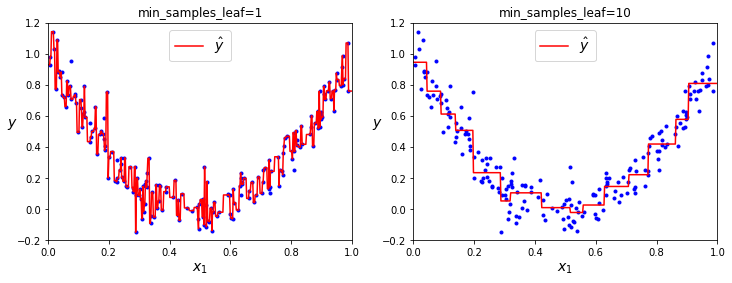

In [18]:
plt.figure(figsize=(12, 4))

for i, min_samples_leaf in enumerate([1, 10]):
    tree_reg = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf, random_state=42)
    tree_reg.fit(X, y)
    plt.subplot(121 + i)
    plot_regression_predictions(tree_reg, X, y, legend=True)
    plt.title("min_samples_leaf={}".format(min_samples_leaf))

# Ensemble Learning

In [19]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel(r"$x_1$", fontsize=15)
    plt.ylabel(r"$x_2$", fontsize=15, rotation=0)

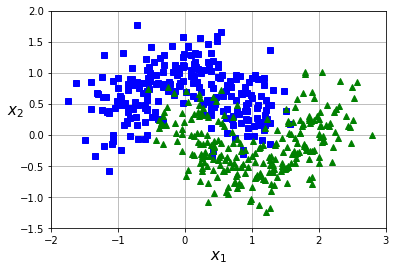

In [21]:
plot_dataset(X, y, [-2, 3, -1.5, 2])

**"Hard"** - predict the majority class:

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[("lr", log_clf), ("rf", rnd_clf), ("svc", svm_clf)],
    voting="hard")
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [23]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


**"Soft"** - predict class with highest average probability across all estimators:

In [24]:
svm_clf_pedict_proba = SVC(probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[("lr", log_clf), ("rf", rnd_clf), ("svc", svm_clf_pedict_proba)],
    voting="soft")

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


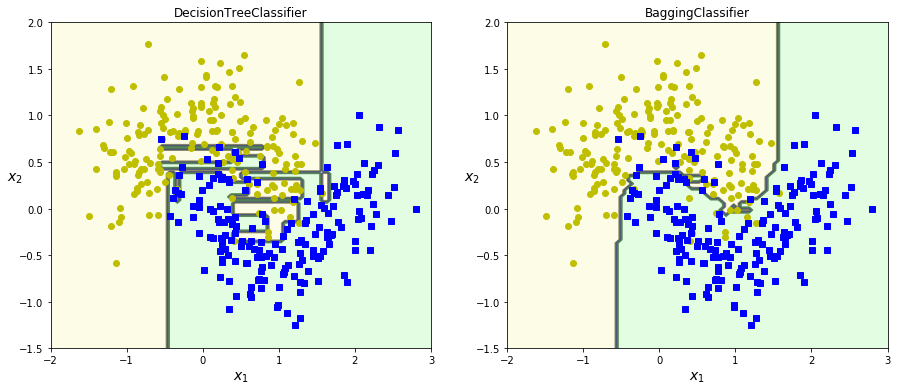

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

single_tree_clf = DecisionTreeClassifier(max_depth=100)
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, 
                            max_samples=100, bootstrap=True, n_jobs=-1)
single_tree_clf.fit(X_train, y_train)
bag_clf.fit(X_train, y_train)

plt.figure(figsize=(15, 6))
for i, clf in enumerate([single_tree_clf, bag_clf]):
    plt.subplot(121 + i)
    plot_decision_boundary(clf, X_train, y_train, iris=False, axes=[-2, 3, -1.5, 2])
    plt.title(clf.__class__.__name__)

In [26]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, 
                            bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.8933333333333333

In [27]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.92

In [28]:
bag_clf.oob_decision_function_[:3]

array([[0.46428571, 0.53571429],
       [0.39698492, 0.60301508],
       [1.        , 0.        ]])

## Feature Importances

In [29]:
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876374
sepal width (cm) 0.023119288282510326
petal length (cm) 0.44103046436395765
petal width (cm) 0.4233579963547681


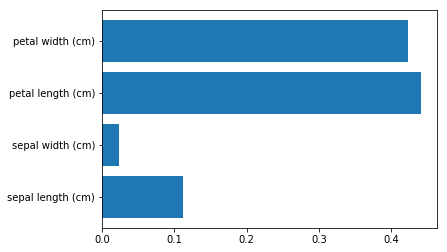

In [30]:
plt.barh(range(iris["data"].shape[1]), rnd_clf.feature_importances_)
plt.yticks(range(len(rnd_clf.feature_importances_)), iris["feature_names"]);

In [31]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")

In [32]:
rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [33]:
import matplotlib as mpl

In [34]:
def plot_digit(data):
    img_data = data.reshape(28, 28)
    plt.imshow(img_data, cmap=mpl.cm.hot, interpolation='nearest')
    plt.axis("off")

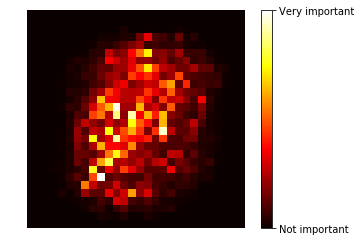

In [35]:
plot_digit(rnd_clf.feature_importances_)
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important']);

## Boosting

### AdaBoost (Adaptive Boosting)

At the beginiing all sample's weights are the same:

$w^{(i)} = \dfrac{1}{m}$

Weighted error frequency for j-th estimator:

$r_j = \dfrac{\underset{\hat{y}_j^{(i)}\neq y^{(i)}}{\phantom{123}\sum\limits_{i=1}^{m}w^{(i)}}}{\phantom{123}\sum\limits_{i=1}^{m}w^{(i)}}$

And $\alpha_j$ weight for j-th estimator:

$\alpha_j=\eta\log\dfrac{1-r_j}{r_j}$

$\eta$ - learning rate

The higher $\alpha_j$ - the most accurate $j$-th estimator is. $\alpha_j$ close to 0 if $j$-th estimator makes random predictions. And $\alpha_j$ is negative if $j$-th estimator predicts worth than random.

Weights update rule:

for $i=1, 2, \ldots, m$

$w^{(i)}\leftarrow\left\{\begin{array}{ll}
w^{(i)}, & \text{if }\hat{y}_j^{(i)}=y^{(i)}\\
w^{(i)}\exp\left(\alpha_j\right), & \text{if }\hat{y}_j^{(i)}\neq y^{(i)}
\end{array}\right.$

After weights recalculated they normalized by dividing by $\sum_{i=1}^{m}w^{(i)}$

**AdaBoost Predictions**

$\hat{y}(\mathbf{x})=\underset{k}{\text{argmax}}\underset{\hat{y}_j(\mathbf{x})=k}{\sum\limits_{j=1}^N \alpha_j}$

In [36]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, 
                             algorithm="SAMME.R", learning_rate=0.5)  # SAMME.R calculate probaility (not majority) across all estimators
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=None)

In [37]:
ada_clf.score(X_test, y_test)

0.896

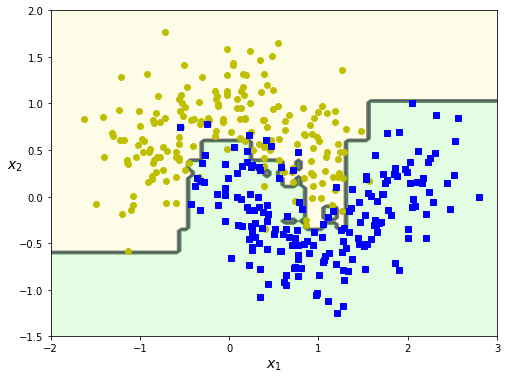

In [38]:
plt.figure(figsize=(8, 6))
plot_decision_boundary(ada_clf, X_train, y_train, iris=False, axes=[-2, 3, -1.5, 2])

## Gradient Boosting

In [39]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

Text(0.5,1,'Estimator_3')

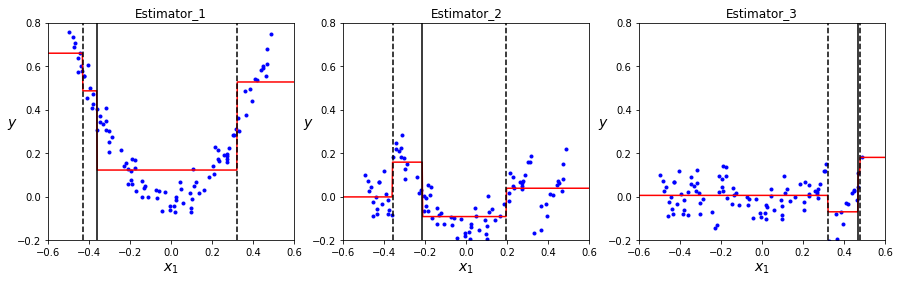

In [40]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg3 = DecisionTreeRegressor(max_depth=2)

plt.figure(figsize=(15, 4))

plt.subplot(131)
tree_reg1.fit(X, y)
plot_regression_predictions(tree_reg1, X, y, axes=[-0.6, 0.6, -0.2, 0.8], plot_thresholds=True)
plt.title("Estimator_1")

plt.subplot(132)
y2 = y - tree_reg1.predict(X)
tree_reg2.fit(X, y2)
plot_regression_predictions(tree_reg2, X, y2, axes=[-0.6, 0.6, -0.2, 0.8], plot_thresholds=True)
plt.title("Estimator_2")

plt.subplot(133)
y3 = y2 - tree_reg2.predict(X)
tree_reg3.fit(X, y3)
plot_regression_predictions(tree_reg3, X, y3, axes=[-0.6, 0.6, -0.2, 0.8], plot_thresholds=True)
plt.title("Estimator_3")

In [41]:
print("Individual predictions for x_1 = 0: ", 
      tree_reg1.predict([[0.]]), tree_reg2.predict([[0.]]), tree_reg3.predict([[0.]]))
print("'Collective' prediction for x_1 = 0: ", sum(tree.predict([[0.]]) for tree in [tree_reg1, tree_reg2, tree_reg3]))

Individual predictions for x_1 = 0:  [0.12356613] [-0.09039794] [0.00704347]
'Collective' prediction for x_1 = 0:  [0.04021166]


In [42]:
# Discover the sum() function behavior in case of iterator object inside it #

# a = np.array([1, 2, 3])
# b = np.array([5, 5, 5])
# print(tree_reg1.predict([[0.], [0.37], [0.5]]))
# print(tree_reg2.predict([[0.], [0.37], [0.5]]))
# c = (tree.predict([[0.], [0.37], [0.5]]) for tree in [tree_reg1, tree_reg2])
# s = np.array([0, 0, 0])
# for item in c:
#     print("item:", item)
#     s = sum(s, item)
#     print("S", s)
# print(sum(tree.predict([[0.], [0.37], [0.5]]) for tree in [tree_reg1, tree_reg2]))

In [43]:
def plot_predictions(regressors, X, y, axes=[-1, 1, -0.5, 1], label=None, 
                     pred_style="r-", data_style="b.", data_label=None):
    x_new = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x_new.reshape(-1, 1)) for regressor in regressors)  # under the hood sum here 
                                                                                       # will do s = s + new 
                                                                                       # (not sum(s, new) - see above)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x_new, y_pred, pred_style, label=label)
    plt.axis(axes)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=12)

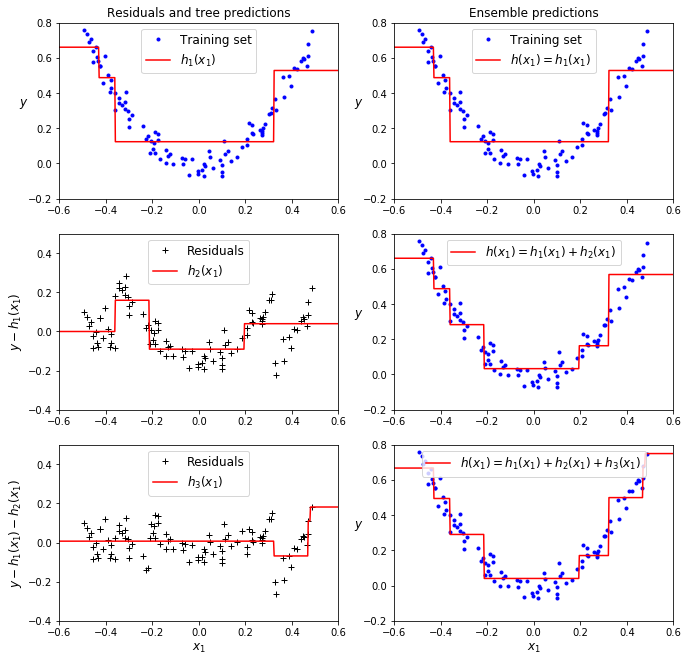

In [44]:
plt.figure(figsize=(11, 11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.6, 0.6, -0.2, 0.8], label=r"$h_1(x_1)$", data_label="Training set")
plt.ylabel(r"$y$", rotation=0, fontsize=12)
plt.title("Residuals and tree predictions")

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.6, 0.6, -0.2, 0.8], label=r"$h(x_1)=h_1(x_1)$",
                 data_label="Training set")
plt.title("Ensemble predictions")
plt.ylabel(r"$y$", rotation=0, fontsize=12)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.6, 0.6, -0.4, 0.5], label=r"$h_2(x_1)$", 
                 data_label="Residuals", data_style="+k")
plt.ylabel(r"$y-h_1(x_1)$", fontsize=12)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.6, 0.6, -0.2, 0.8], label=r"$h(x_1)=h_1(x_1)+h_2(x_1)$")
plt.ylabel(r"$y$", rotation=0, fontsize=12)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.6, 0.6, -0.4, 0.5], label=r"$h_3(x_1)$", 
                 data_label="Residuals", data_style="+k")
plt.ylabel(r"$y-h_1(x_1)-h_2(x_1)$", fontsize=12)
plt.xlabel(r"$x_1$", fontsize=12)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.6, 0.6, -0.2, 0.8], 
                 label=r"$h(x_1)=h_1(x_1)+h_2(x_1)+h_3(x_1)$")
plt.ylabel(r"$y$", rotation=0, fontsize=12)
plt.xlabel(r"$x_1$", fontsize=12);

The same as above by using Scikit-Learn:

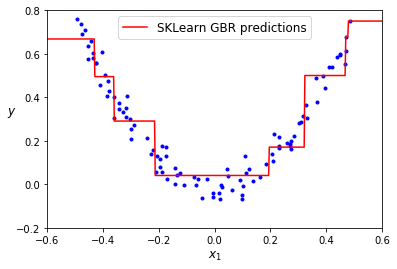

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)
plot_predictions([gbrt], X, y, axes=[-0.6, 0.6, -0.2, 0.8], label="SKLearn GBR predictions")
plt.ylabel(r"$y$", rotation=0, fontsize=12)
plt.xlabel(r"$x_1$", fontsize=12);

Learning rate limits the contribution of trees to the final result. If the learning rate value is too low and the ensemble has few estimators, it can lead to underfitting. But if the learning rate value is still low but the number of estimators is too high - it can lead to overfitting:

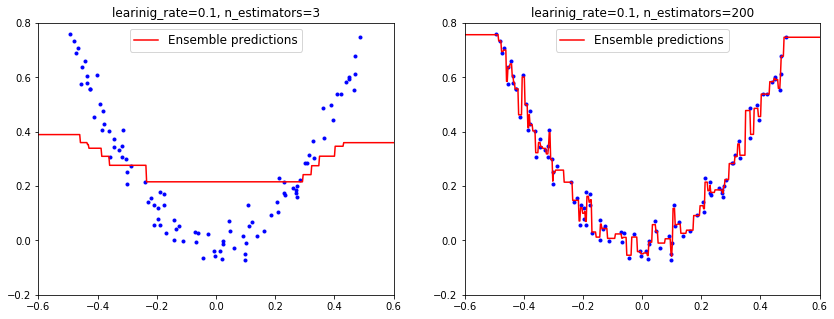

In [46]:
plt.figure(figsize=(14, 5))
for i, n_estim in enumerate((3, 200)):
    plt.subplot(121 + i)
    gbrt = GradientBoostingRegressor(learning_rate=0.1, n_estimators=n_estim, random_state=42)
    gbrt.fit(X, y)
    plot_predictions([gbrt], X, y, axes=[-0.6, 0.6, -0.2, 0.8], label="Ensemble predictions")
    plt.title("learinig_rate=0.1, n_estimators={}".format(n_estim))

### Early stopping with Gradient Boosting

Using ``stage_predict`` method:

In [112]:
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=55)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
best_n_estimators = np.argmin(errors)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators, random_state=42)
gbrt.fit(X_train, y_train)
print("Best n_estimators: ", best_n_estimators)
print("Accuracy: {:.3f}".format(gbrt.score(X_val, y_val)))

Best n_estimators:  46
Accuracy: 0.977


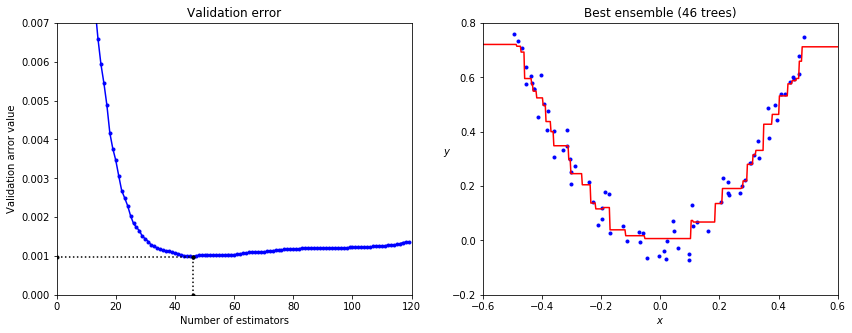

In [126]:
plt.figure(figsize=(14, 5))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([best_n_estimators, best_n_estimators], [0, errors[best_n_estimators]], "k.:")
plt.plot([0, best_n_estimators], [errors[best_n_estimators], errors[best_n_estimators]], "k:.")
plt.axis([0, 120, 0, 0.007])
plt.xlabel("Number of estimators")
plt.ylabel("Validation arror value")
plt.title("Validation error")

plt.subplot(122)
plot_predictions([gbrt], X_train, y_train, axes=[-0.6, 0.6, -0.2, 0.8])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$", rotation=0)
plt.title("Best ensemble ({} trees)".format(best_n_estimators));

Real early stopping:

In [137]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = np.infty
error_going_up = 0

for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break
print("Best estimators: ", gbrt.n_estimators)
print("Accuracy: {:.3f}".format(gbrt.score(X_val, y_val)))

Best estimators:  52
Accuracy: 0.976
